In [5]:
import pandas as pd

import sys, os
sys.path.append('/Users/raynoldng/Projects/ieee-fraud-detection')
# sys.path.append('/home/raynoldng/Desktop/ieee-fraud-detection')
import fraud.feature_engineering as fe
import fraud.utils as utils
import numpy as np

In [2]:
train, test = utils.load_data(reduce_mem=False)

(590540, 434)
(506691, 433)


In [66]:
def map_transaction_amount(train, test):
    test['isFraud'] = 'test'
    temp = pd.concat([train, test], axis=0, sort=False)

    temp['Trans_min_mean'] = temp['TransactionAmt'] - temp['TransactionAmt'].mean()
    temp['Trans_min_std'] = temp['Trans_min_mean'] / temp['TransactionAmt'].std()

#     temp['TransactionAmt_to_mean_card1'] = temp['TransactionAmt'] / temp.groupby(['card1'])['TransactionAmt'].transform('mean')
#     temp['TransactionAmt_to_mean_card4'] = temp['TransactionAmt'] / temp.groupby(['card4'])['TransactionAmt'].transform('mean')
#     temp['TransactionAmt_to_std_card1'] = temp['TransactionAmt'] / temp.groupby(['card1'])['TransactionAmt'].transform('std')
#     temp['TransactionAmt_to_std_card4'] = temp['TransactionAmt'] / temp.groupby(['card4'])['TransactionAmt'].transform('std')

    temp['TransactionAmt_log'] = np.log(temp['TransactionAmt'])

    
    nice_vals = [0, 950, 949, 500]
    temp['TransactionAmt_cents'] = np.floor((temp['TransactionAmt'] % 1) * 1000)
    temp['TransactionAmt_cents_nice'] = temp['TransactionAmt_cents'].isin(nice_vals)
    
    train = temp[temp['isFraud'] != 'test']
    test = temp[temp['isFraud'] == 'test'].drop('isFraud', axis=1)

    return train, test

In [67]:
train_amt, test_amt = map_transaction_amount(train, test)

In [68]:
txn_cols = [c for c in train_amt.columns if 'TransactionAmt' in c]

In [69]:
train_amt[txn_cols].describe()

,TransactionAmt,TransactionAmt_log,TransactionAmt_cents
count,590540.000000,590540.000000,590540.000000
mean,135.027176,4.363864,379.275067
std,239.162522,0.954037,433.960580
min,0.251000,-1.382302,0.000000
25%,43.321000,3.768638,0.000000
50%,68.769000,4.230753,0.000000
75%,125.000000,4.828314,949.000000
max,31937.391000,10.371533,999.000000


In [44]:
train_amt['TransactionAmt_cents'] = train_amt['TransactionAmt_cents'].astype(np.int32) 

In [71]:
train_amt['TransactionAmt_cents_nice'].value_counts()

True     495569
False     94971
Name: TransactionAmt_cents_nice, dtype: int64

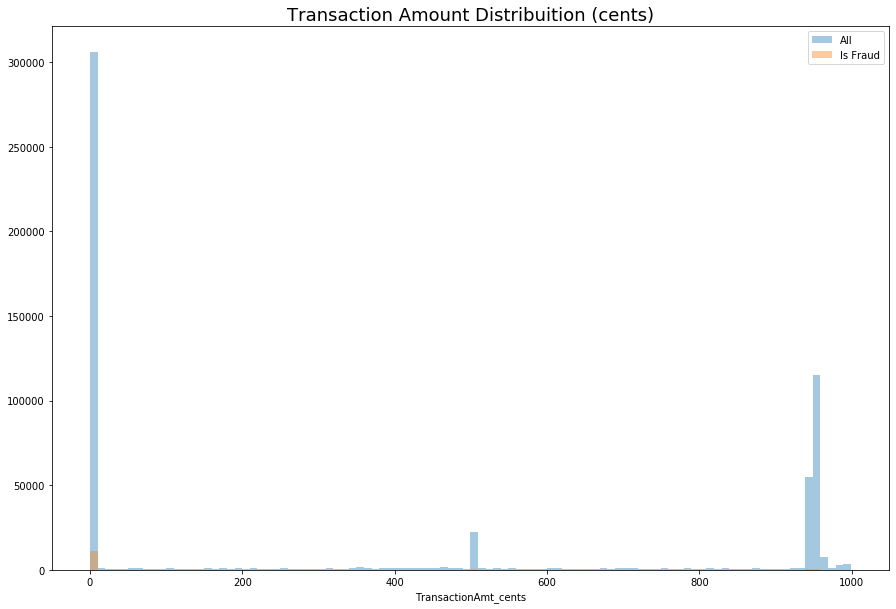

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

g2 = sns.distplot(train_amt['TransactionAmt_cents'], kde=False,bins=100)
g2 = sns.distplot(train_amt[train_amt['isFraud'] == 1]['TransactionAmt_cents'], kde=False, bins=100)
g2.set_title("Transaction Amount Distribuition (cents)", fontsize=18)
g2.legend(['All', 'Is Fraud'])

plt.show()

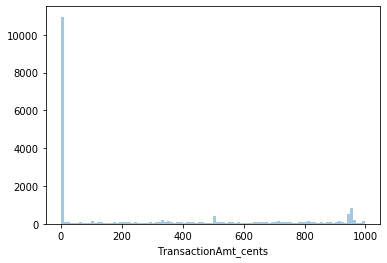

In [74]:
sns.distplot(train_amt[train_amt['isFraud'] == 1]['TransactionAmt_cents'], kde=False, bins=100)

In [76]:
(train_amt[(train_amt['isFraud'] == 1) & train_amt['TransactionAmt_cents'] > 800]['TransactionAmt_cents']).value_counts()

Series([], Name: TransactionAmt_cents, dtype: int64)

In [82]:
(train_amt[(train_amt['isFraud'] == 1) & (train_amt['TransactionAmt_cents'] > 800)]['TransactionAmt_cents']).value_counts()

950.0    757
949.0    468
969.0     67
966.0     59
911.0     55
990.0     51
835.0     49
814.0     46
818.0     44
829.0     36
989.0     34
993.0     31
945.0     31
879.0     30
844.0     29
903.0     29
928.0     28
914.0     26
817.0     26
858.0     26
888.0     26
850.0     24
875.0     23
809.0     23
876.0     22
962.0     20
936.0     19
901.0     19
961.0     19
917.0     18
        ... 
952.0      2
813.0      2
999.0      2
880.0      2
824.0      1
854.0      1
855.0      1
877.0      1
980.0      1
985.0      1
867.0      1
982.0      1
933.0      1
827.0      1
869.0      1
954.0      1
860.0      1
938.0      1
934.0      1
987.0      1
898.0      1
958.0      1
937.0      1
878.0      1
912.0      1
841.0      1
894.0      1
963.0      1
889.0      1
873.0      1
Name: TransactionAmt_cents, Length: 164, dtype: int64

TransactionAmt_to_std_card1 is the cause of the problem

In [20]:
train_amt[train_amt['TransactionAmt_to_std_card1'].isnull() == True]

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,DeviceType,DeviceInfo,Trans_min_mean,Trans_min_std,TransactionAmt_to_mean_card1,TransactionAmt_to_mean_card4,TransactionAmt_to_std_card1,TransactionAmt_to_std_card4,TransactionAmt_log,TransactionAmt_cents
44,2987044,0,87266,39.500,W,9281,555.0,150.0,visa,195.0,...,desktop,Windows,-95.387897,-0.393773,1.0,0.295102,NaN,0.166882,3.676301,500.0
96,2987096,0,88131,108.500,W,15121,555.0,150.0,visa,226.0,...,mobile,LG-K500 Build/MMB29M,-26.387897,-0.108933,1.0,0.810595,NaN,0.458397,4.686750,500.0
752,2987752,0,101090,96.974,C,7499,545.0,185.0,visa,137.0,...,desktop,MacOS,-37.913897,-0.156513,1.0,0.724486,NaN,0.409701,4.574443,973.0
1332,2988332,0,131423,97.000,W,4553,268.0,150.0,mastercard,166.0,...,desktop,rv:52.0,-37.887897,-0.156406,1.0,0.735549,NaN,0.388236,4.574711,0.0
1534,2988534,0,135179,114.950,W,15688,555.0,150.0,visa,226.0,...,desktop,NaN,-19.937897,-0.082306,1.0,0.858783,NaN,0.485647,4.744497,950.0
2199,2989199,0,143825,117.000,W,6238,122.0,150.0,mastercard,166.0,...,mobile,iOS Device,-17.887897,-0.073843,1.0,0.887208,NaN,0.468284,4.762174,0.0
2219,2989219,0,143987,209.950,W,3958,361.0,150.0,visa,226.0,...,mobile,iOS Device,75.062103,0.309866,1.0,1.568521,NaN,0.887009,5.346869,949.0
2290,2989290,0,144660,100.000,R,11234,390.0,150.0,mastercard,102.0,...,desktop,Windows,-34.887897,-0.144022,1.0,0.758298,NaN,0.400243,4.605170,0.0
2336,2989336,0,145069,57.950,W,11344,555.0,150.0,visa,226.0,...,mobile,iOS Device,-76.937897,-0.317609,1.0,0.432940,NaN,0.244831,4.059581,950.0
2622,2989622,0,147870,25.000,S,15570,555.0,150.0,visa,226.0,...,desktop,Windows,-109.887897,-0.453631,1.0,0.186773,NaN,0.105621,3.218876,0.0


In [21]:
temp = pd.concat([train, test], axis=0, sort=False)

In [23]:
temp_gp = temp.groupby(['card1'])['TransactionAmt'].transform('std')
temp_gp.describe()

count    1.093204e+06
mean     1.927668e+02
std      1.275135e+02
min      0.000000e+00
25%      1.088476e+02
50%      1.808354e+02
75%      2.508030e+02
max      3.051555e+03
Name: TransactionAmt, dtype: float64

In [26]:
print("temp_gp shape:", temp_gp.shape)
print("temp shape:", temp.shape)

temp_gp shape: (1097231,)
temp shape: (1097231, 434)


In [34]:
temp['card1'].value_counts()

7919     28015
9500     26243
15885    22691
17188    19606
15066    14606
6019     13268
12695    12732
12544    12694
2803     11043
7585     10097
12839     9593
10616     9419
3154      9253
9633      8909
2884      7683
18132     7635
15497     7266
16132     7253
16075     7053
5812      6697
7508      6659
2616      6196
10112     6058
4461      5959
12501     5886
10057     5642
16659     5627
11207     5595
7664      5237
16136     5155
         ...  
1438         1
8603         1
17815        1
13721        1
11674        1
16787        1
7087         1
12200        1
1432         1
7574         1
8594         1
7086         1
9618         1
10642        1
7572         1
8111         1
8604         1
17808        1
5530         1
13727        1
7579         1
1964         1
16785        1
16299        1
14250        1
14750        1
12703        1
17809        1
3480         1
12204        1
Name: card1, Length: 17091, dtype: int64

In [84]:
train_fraud = train[train['isFraud'] == 1]

In [86]:
train_fraud[['D1', 'D2', 'D3', 'D4']]

,D1,D2,D3,D4
203,57.0,57.0,52.0,0.0
240,0.0,NaN,NaN,0.0
243,0.0,NaN,NaN,0.0
245,0.0,NaN,NaN,0.0
288,0.0,NaN,NaN,0.0
367,0.0,NaN,NaN,NaN
405,0.0,NaN,NaN,0.0
630,2.0,2.0,2.0,2.0
683,2.0,2.0,0.0,2.0
736,217.0,169.0,2.0,289.0
